# Golomb's ruler

In [1]:
%load_ext iminizinc

<IPython.core.display.Javascript object>

MiniZinc to FlatZinc converter, version 2.5.0, build 198486215
Copyright (C) 2014-2020 Monash University, NICTA, Data61


In [2]:
%%mzn_model golomb
include "alldifferent.mzn";
include "increasing.mzn";

int: n; % number of marks ('order')
int: max_length = pow(2,n); % upper bound on the length

array[1..n] of var 0..max_length: mark;
var int: length = max(mark);

array[1..n,1..n] of var 0..max_length: dist;

constraint forall(i, j in 1..n where i < j)(dist[i, j] = abs(mark[i] - mark[j]));
constraint alldifferent(mark);
constraint alldifferent(i, j in 1..n where i < j)(dist[i, j]);

output ["length: \(length), marks: " ++ show(mark)];

% symmetry breaking
constraint increasing(mark); 
constraint mark[1]=0; 
constraint forall(i, j in 1..n where i >= j)(dist[i, j] = 0);

% implicit constraints
% based on dist[i,j] = dist[i,i+1] + dist[i+1,i+2] + ... + dist[j-1,j], estimate distances by 1, sum from i to j
constraint forall(i, j in 1..n where i < j)(
  dist[i,j] >= (j-i)*(j-i+1) div 2 /\
  dist[i,j] <= length - (n-j+i-1)*(n-j+i) div 2 
);

solve :: int_search(dist, input_order, indomain_min) minimize length;

In [3]:
for n in range(1,10+1):    
    result = %minizinc golomb
    print(f"n={n}: {result['mark']}")

n=1: [0]
n=2: [0, 1]
n=3: [0, 1, 3]
n=4: [0, 1, 4, 6]
n=5: [0, 1, 4, 9, 11]
n=6: [0, 1, 4, 10, 12, 17]
n=7: [0, 1, 4, 10, 18, 23, 25]
n=8: [0, 1, 4, 9, 15, 22, 32, 34]
n=9: [0, 1, 5, 12, 25, 27, 35, 41, 44]
n=10: [0, 1, 6, 10, 23, 26, 34, 41, 53, 55]


### Compare optimization levels

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [5]:
nmax = 10

data = np.zeros((6,nmax))

for i in range(0, 6):
    print(f"Optimization level: {i}")
    for n in range(1,nmax+1):
        tic = time.perf_counter()
        result = !minizinc golomb-more-improvements.mzn -D"n={n}" -O{i}
        toc = time.perf_counter()
        t = round(toc-tic,2)        
        data[i,n-1] = t     
        print(f"n={n}: t={t}")


Optimization level: 0
n=1: t=0.11
n=2: t=0.11
n=3: t=0.12
n=4: t=0.11
n=5: t=0.13
n=6: t=0.16
n=7: t=0.13
n=8: t=0.15
n=9: t=0.32
n=10: t=1.18
Optimization level: 1
n=1: t=0.11
n=2: t=0.11
n=3: t=0.15
n=4: t=0.16
n=5: t=0.13
n=6: t=0.12
n=7: t=0.12
n=8: t=0.18
n=9: t=0.28
n=10: t=1.13
Optimization level: 2
n=1: t=0.19
n=2: t=0.18
n=3: t=0.19
n=4: t=0.19
n=5: t=0.2
n=6: t=0.23
n=7: t=0.28
n=8: t=0.29
n=9: t=0.41
n=10: t=1.26
Optimization level: 3
n=1: t=0.24
n=2: t=0.21
n=3: t=0.23
n=4: t=0.24
n=5: t=0.24
n=6: t=0.24
n=7: t=0.23
n=8: t=0.3
n=9: t=0.44
n=10: t=1.21
Optimization level: 4
n=1: t=0.2
n=2: t=0.21
n=3: t=0.2
n=4: t=0.25
n=5: t=0.24
n=6: t=0.28
n=7: t=0.4
n=8: t=1.21
n=9: t=8.89
n=10: t=62.01
Optimization level: 5
n=1: t=0.18
n=2: t=0.19
n=3: t=0.2
n=4: t=0.21
n=5: t=0.21
n=6: t=0.24
n=7: t=0.38
n=8: t=1.16
n=9: t=11.09
n=10: t=80.27


In [6]:
x = np.arange(1, nmax+1)

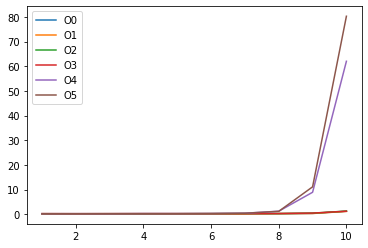

In [7]:
for i in range(6):
    plt.plot(x, data[i,:], label=f'O{i}')

plt.legend();

Optimization level: 0
n=10: t=1.4
Optimization level: 1
n=10: t=1.42
Optimization level: 2
n=10: t=1.48
Optimization level: 3
n=10: t=1.55
Optimization level: 4
n=10: t=74.34
Optimization level: 5
n=10: t=65.91


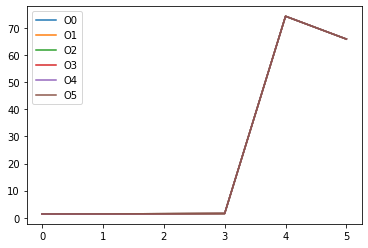

In [11]:
n = 10
y = np.zeros((6,))

for i in range(0, 6):
    print(f"Optimization level: {i}")    
    tic = time.perf_counter()
    result = !minizinc golomb-more-improvements.mzn -D"n={n}" -O{i}
    toc = time.perf_counter()
    t = round(toc-tic,2)        
    y[i] = t     
    print(f"n={n}: t={t}")
        
x = np.arange(0, 6)
for i in range(6):
    plt.plot(x, y, label=f"O{i}")

plt.legend();
